# This notebook uses the iris dataset
https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv 

# Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('Data/iris.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
data['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [6]:
print(data['sepal_length'].mean())
print(data['sepal_length'].median())
print(data['sepal_length'].count())
print(data['sepal_length'].sum())
print(data['sepal_length'].std())

5.843333333333334
5.8
150
876.5
0.828066127977863


In [7]:
data.groupby('species')['sepal_length'].count()

species
setosa        50
versicolor    50
virginica     50
Name: sepal_length, dtype: int64

# Histograms

sepal_length


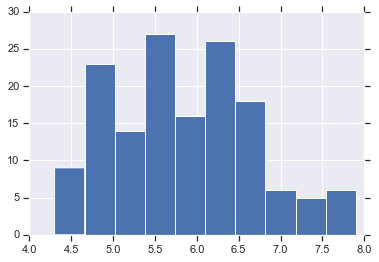

sepal_width


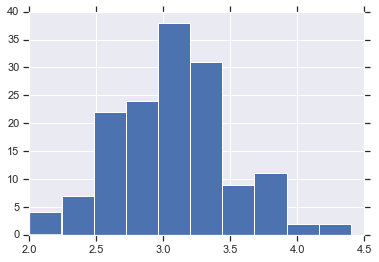

petal_length


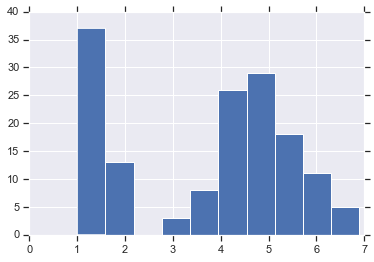

petal_width


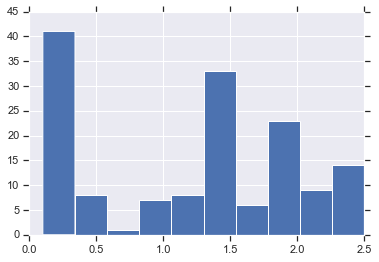

In [8]:
for column in data.columns[:-1]:
    print(column)
    data[column].hist()
    plt.show()

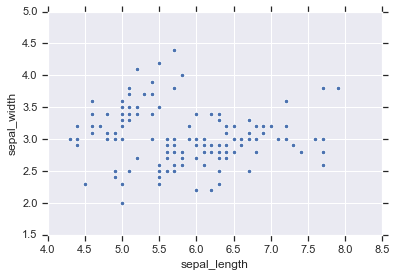

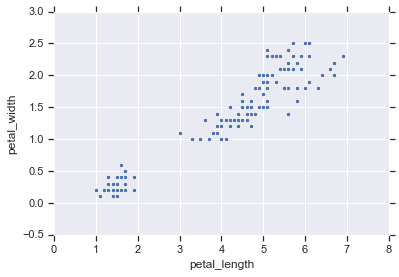

In [9]:
ax = sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data=data)
plt.show()
ax = sns.scatterplot(x = 'petal_length', y = 'petal_width', data=data)

# Machine Learning

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(data[['sepal_length']], data['sepal_width'])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### We can use this model to make predictions

In [13]:
model.predict([[2]])

array([3.27410091])

In [14]:
model.predict([[3], [4], [5]])

array([3.21683268, 3.15956444, 3.10229621])

### Let's plot our predictions on a graph

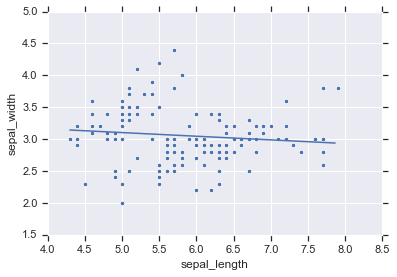

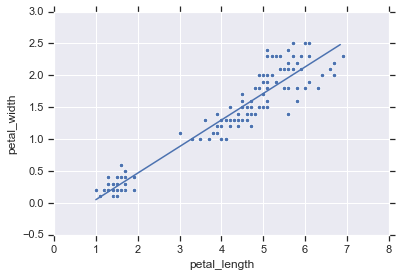

In [15]:
# Generate 100 evenly spaced values from the minimum of the data to the maximum of the data
xvals = np.arange(min(data['sepal_length']), max(data['sepal_length']), 
                  (max(data['sepal_length']) - min(data['sepal_length'])) / 100)
# Plug in the 100 values to the model
model.fit(data[['sepal_length']], data['sepal_width'])
ypred = model.predict(xvals.reshape(-1, 1))
# Plot the origional data
ax = sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data=data)
# Plot the model's predictions
plt.plot(xvals, ypred)
plt.show()

# Same process as above but with petal length and petal width
xvals = np.arange(min(data['petal_length']), max(data['petal_length']), 
                  (max(data['petal_length']) - min(data['petal_length'])) / 100)
model.fit(data[['petal_length']], data['petal_width'])
ypred = model.predict(xvals.reshape(-1, 1))
ax = sns.scatterplot(x = 'petal_length', y = 'petal_width', data=data)
plt.plot(xvals, ypred)

# Adding Species to Plots

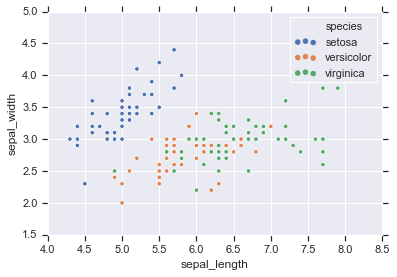

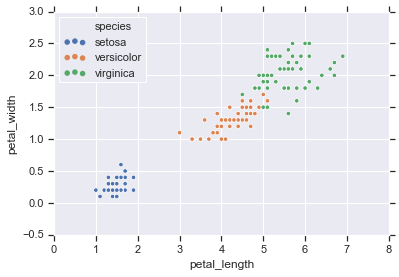

In [16]:
ax = sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue="species", data=data)
plt.show()
ax = sns.scatterplot(x = 'petal_length', y = 'petal_width', hue="species", data=data)
plt.legend(loc='upper left')

# Adding Species to Linear Regression

In [17]:
linreg = LinearRegression()

In [18]:
data['setosa'] = data['species'] == 'setosa'
data['versicolor'] = data['species'] == 'versicolor'

In [19]:
linreg.fit(data[['sepal_length', 'setosa', 'versicolor']], data['sepal_width'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
def plot_model(model, data):
    xvals = list(np.arange(min(data['sepal_length']), max(data['sepal_length']), 
                  (max(data['sepal_length']) - min(data['sepal_length'])) / 100))
    plottingData = pd.DataFrame({
        'sepal_length': xvals,
        'setosa': False,
        'versicolor': False
    })

    ax = sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue="species", data=data)
    # Plot verginicolor
    iris_preds = model.predict(plottingData[['sepal_length', 'setosa', 'versicolor']])
    plt.plot(plottingData['sepal_length'], iris_preds, color = 'green')
    # Plot Versicolor
    plottingData['versicolor'] = True
    iris_preds = model.predict(plottingData[['sepal_length', 'setosa', 'versicolor']])
    plt.plot(plottingData['sepal_length'], iris_preds, color = 'orange')
    # Plot Setosa
    plottingData['versicolor'] = False
    plottingData['setosa'] = True
    iris_preds = model.predict(plottingData[['sepal_length', 'setosa', 'versicolor']])
    plt.plot(plottingData['sepal_length'], iris_preds, color = 'blue')
    plt.show()

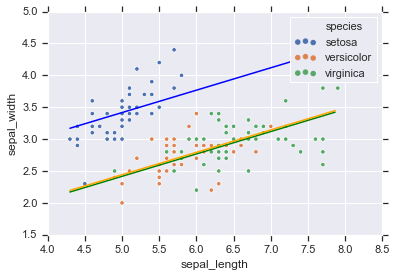

In [21]:
plot_model(linreg, data)

# Logistic Regression

In [22]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

In [23]:
data['species_code'] = (data['species'] == 'virginica') * 2 + (data['species'] == 'versicolor') * 1

In [24]:
clf = LogisticRegression()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


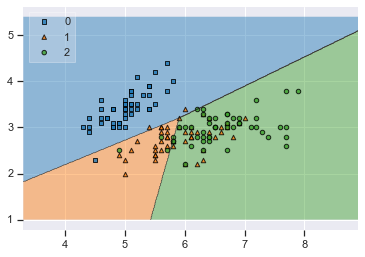

In [25]:
clf.fit(data[['sepal_length', 'sepal_width']], data['species_code'])
plot_decision_regions(data[['sepal_length', 'sepal_width']].values, 
                      data['species_code'].values, clf = clf, legend = 2)

# Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

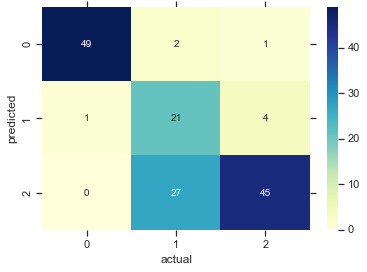

In [27]:
matrix = confusion_matrix(clf.predict(data[['sepal_length', 'sepal_width']]), data['species_code'])
sns.heatmap(matrix, annot=True, fmt = 'd', cmap="YlGnBu")
plt.xlabel("actual")
plt.ylabel("predicted")

# Using Petal Length and Petal Width

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/ma/core.py:6462: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


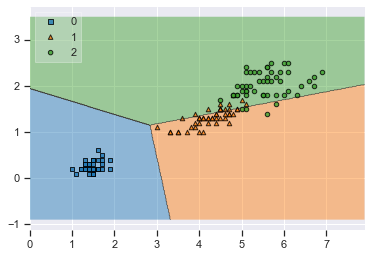

In [28]:
clf.fit(data[['petal_length', 'petal_width']], data['species_code'])
plot_decision_regions(data[['petal_length', 'petal_width']].values, 
                      data['species_code'].values, clf = clf, legend = 2)

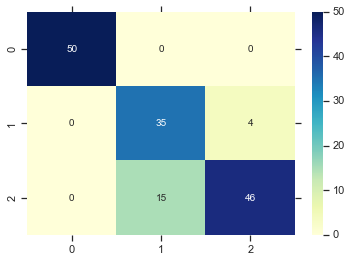

In [29]:
matrix = confusion_matrix(clf.predict(data[['petal_length', 'petal_width']]), data['species_code'])
sns.heatmap(matrix, annot=True, fmt = 'd', cmap="YlGnBu")

# Using all Variables

In [30]:
clf.fit(data[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']], data['species_code'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

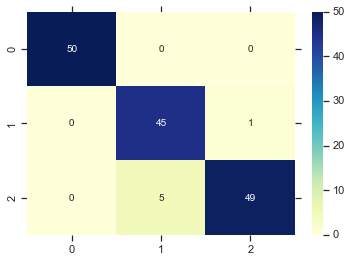

In [31]:
matrix = confusion_matrix(clf.predict(data[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]), 
                          data['species_code'])
sns.heatmap(matrix, annot=True, fmt = 'd', cmap="YlGnBu")

## Overfitting

In [32]:
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [33]:
rf = RandomForestRegressor()
rf.fit(data[['sepal_length', 'setosa', 'versicolor']], data['sepal_width'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

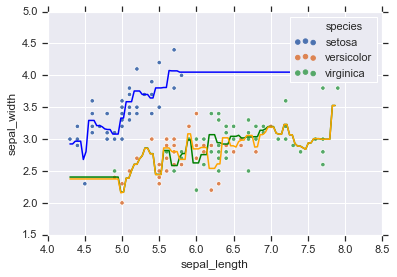

In [34]:
plot_model(rf, data)

# Training and Testing Data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
X = data[['sepal_length', 'setosa', 'versicolor', 'species']]
y = data['sepal_width']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [38]:
rf.fit(X_train[['sepal_length', 'setosa', 'versicolor']], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

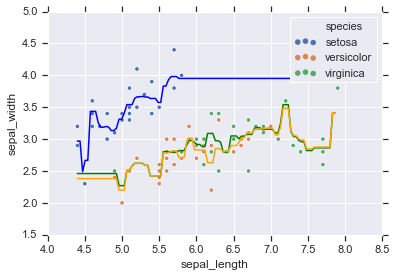

In [39]:
plot_model(rf, pd.concat([X_train, y_train], axis=1))

In [40]:
mean_squared_error(y_train, rf.predict(X_train[['sepal_length', 'setosa', 'versicolor']]))

0.03904872530061098

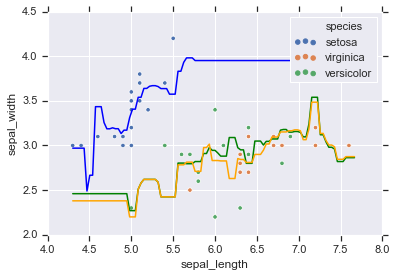

In [41]:
plot_model(rf, pd.concat([X_test, y_test], axis=1))

In [42]:
mean_squared_error(y_test, rf.predict(X_test[['sepal_length', 'setosa', 'versicolor']]))

0.10130388309366335

# Compare to Linear Regression

In [43]:
linreg.fit(X_train[['sepal_length', 'setosa', 'versicolor']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

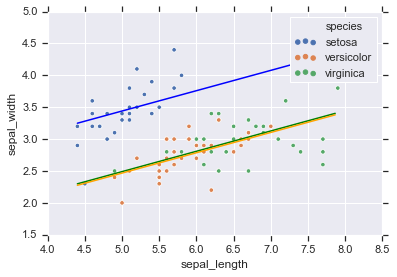

In [44]:
plot_model(linreg, pd.concat([X_train, y_train], axis = 1))

In [45]:
mean_squared_error(y_train, linreg.predict(X_train[['sepal_length', 'setosa', 'versicolor']]))

0.08384564400760308

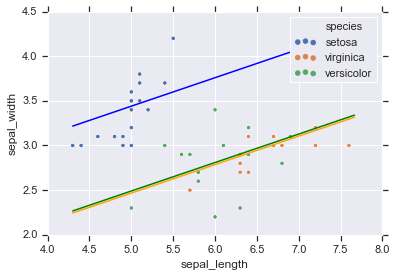

In [46]:
plot_model(linreg, pd.concat([X_test, y_test], axis = 1))

In [47]:
mean_squared_error(y_test, linreg.predict(X_test[['sepal_length', 'setosa', 'versicolor']]))

0.07881380224588842